# <b><span style='color:#F1A424'>AutoML - Binary Classification </span> </b>

## <b> Problem overview:</b>
    

**Dataset used - Bank Churn Dataset**

**Features**:

- `customer_id`: customer_id .
- `credit_score`: credit score of customer.
- `country`: country of customer.
- `gender`: Gender of customer.
- `age`: Age of customer.
- `tenure`: tenure.
- `balance`: bank balance.
- `products_number`: products number.
- `credit_card`: having credit card or not.
- `active_member`: active member or not.
- `estimated_salary`: Estimated salary of customer..

**Target Variable**:

- `churn`: 1 if the client has left the bank during some period or 0 if he/she has not.

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the Customer Churn for ABC Bank.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Binning on 'Age' feature :
    - Aim is to treat 'Age' as categorical variable rather than numerical and check how different age group people will impact prediction.
- Target encoding on 'gender' feature :
    - Aim is to get gender feature encoded with help of target column distribution rather than default encoding i.e., one-hot encoding.
- Deletion of id column 'customer_id' using antiselect.
- Feature scaling using 'std' method. 

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','bank_churn')

In [5]:
# Fetching in teradata dataframe
bank_df = DataFrame("bank_churn")

In [6]:
# first 5 rows
bank_df.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0


In [7]:
# bank_df dataset
bank_df.shape

(10000, 12)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
bank_df_sample = bank_df.sample(frac = [0.8, 0.2])

In [9]:
bank_df_sample.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,sampleid
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0,1
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0,1
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0,1
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0,1
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0,1
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0,1
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0,1
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0,1
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0,1


In [10]:
# Fetching train and test data
bank_df_train= bank_df_sample[bank_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bank_df_test = bank_df_sample[bank_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
bank_df_train.shape

(8000, 12)

In [12]:
# test data shape
bank_df_test.shape

(2000, 12)

In [13]:
#train dataset
bank_df_train.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0


In [14]:
# test dataset
bank_df_test.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15566312,660,Spain,Female,42,5,0.0,3,1,1,189016.24,1
15566467,683,Germany,Female,32,0,138171.1,2,1,1,188203.58,0
15566543,573,Spain,Male,44,9,0.0,2,1,0,107124.17,0
15566563,777,France,Female,30,4,137851.31,1,1,0,5008.23,1
15566689,554,Spain,Male,66,8,0.0,2,1,1,116747.62,0
15566891,584,Germany,Female,41,3,88594.93,1,1,0,178997.89,0
15566594,709,Spain,Male,23,10,0.0,2,0,0,129590.18,0
15566380,586,Spain,Female,33,10,66948.67,2,1,1,140759.03,0
15566269,787,France,Male,25,5,0.0,2,1,0,47307.9,0
15566091,545,Spain,Female,32,4,0.0,1,1,0,94739.2,0


In [15]:
AutoClassifier.generate_custom_config("custom_bank_churn")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  1



Customizing Feature Engineering Phase ...

Available options for customization of feature engineering phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Missing Value Handling

Index 2: Customize Bincode Encoding

Index 3: Customize String Manipulation

Index 4: Customize Categorical Encoding

Index 5: Customize Mathematical Transformation

Index 6: Customize Nonlinear Transformation

Index 7: Customize Antiselect Features

Index 8: Back to main menu

Index 9: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in feature engineering phase:  2,4,7,8



Customizing Bincode Encoding ...

Provide the following details to customize binning and coding encoding:

Available binning methods with corresponding indices:
Index 1: Equal-Width
Index 2: Variable-Width



Enter the feature or list of features for binning:  age

Enter the index of corresponding binning method for feature age:  2

Enter the number of bins for feature age:  4



Available value type of feature for variable binning with corresponding indices:
Index 1: int
Index 2: float

Provide the range for bin 1 of feature age: 



Enter the index of corresponding value type of feature age:  1

Enter the minimum value for bin 1 of feature age:  0

Enter the maximum value for bin 1 of feature age:  24

Enter the label for bin 1 of feature age:  young



Provide the range for bin 2 of feature age: 



Enter the index of corresponding value type of feature age:  1

Enter the minimum value for bin 2 of feature age:  25

Enter the maximum value for bin 2 of feature age:  49

Enter the label for bin 2 of feature age:  adult



Provide the range for bin 3 of feature age: 



Enter the index of corresponding value type of feature age:  1

Enter the minimum value for bin 3 of feature age:  50

Enter the maximum value for bin 3 of feature age:  74

Enter the label for bin 3 of feature age:  old



Provide the range for bin 4 of feature age: 



Enter the index of corresponding value type of feature age:  1

Enter the minimum value for bin 4 of feature age:  75

Enter the maximum value for bin 4 of feature age:  100

Enter the label for bin 4 of feature age:  older



Customization of bincode encoding has been completed successfully.

Customizing Categorical Encoding ...

Provide the following details to customize categorical encoding:

Available categorical encoding methods with corresponding indices:
Index 1: OneHotEncoding
Index 2: OrdinalEncoding
Index 3: TargetEncoding



Enter the list of corresponding index categorical encoding methods you want to use:  gender



**ERROR:** invalid literal for int() with base 10: 'gender'



Enter the correct input:  3

Enter the feature or list of features for TargetEncoding:  gender



Available target encoding methods with corresponding indices:
Index 1: CBM_BETA
Index 2: CBM_DIRICHLET
Index 3: CBM_GAUSSIAN_INVERSE_GAMMA



Enter the index of target encoding method for feature gender:  1

Enter the response column for target encoding method for feature gender:  churn



Customization of categorical encoding has been completed successfully.

Customizing Antiselect Features ...



Enter the feature or list of features for antiselect:  customer_id



Customization of antiselect features has been completed successfully.

Customization of feature engineering phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  2



Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Train Test Split

Index 2: Customize Data Imbalance Handling

Index 3: Customize Outlier Handling

Index 4: Customize Feature Scaling

Index 5: Back to main menu

Index 6: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  4,5



Available feature scaling methods with corresponding indices:
Index 1: maxabs
Index 2: mean
Index 3: midrange
Index 4: range
Index 5: rescale
Index 6: std
Index 7: sum
Index 8: ustd



Enter the corresponding index feature scaling method:  6



Customization of feature scaling has been completed successfully.

Customization of data preparation phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  4



Generating custom json and exiting ...

Process of generating custom config file for AutoML has been completed successfully.

'custom_bank_churn.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [16]:
# Creating AutoClassifier instance
# Excluding svm and glm from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-RECALL', early stopping timer threshold to 300 sec
# Using verbose level 2 for detailed loggging
# Passing custom json file to provide customized value for AutoML.

aml = AutoClassifier(exclude=['svm', 'glm'],
                     stopping_metric='MICRO-RECALL', 
                     stopping_tolerance=0.60,
                     max_runtime_secs=300,
                     verbose=2,
                     custom_config_file='custom_bank_churn.json')


 Received below input for customization : 
{
    "BincodeIndicator": true,
    "BincodeParam": {
        "age": {
            "Type": "Variable-Width",
            "NumOfBins": 4,
            "Bin_1": {
                "min_value": 0,
                "max_value": 24,
                "label": "young"
            },
            "Bin_2": {
                "min_value": 25,
                "max_value": 49,
                "label": "adult"
            },
            "Bin_3": {
                "min_value": 50,
                "max_value": 74,
                "label": "old"
            },
            "Bin_4": {
                "min_value": 75,
                "max_value": 100,
                "label": "older"
            }
        }
    },
    "CategoricalEncodingIndicator": true,
    "CategoricalEncodingParam": {
        "TargetEncodingIndicator": true,
        "TargetEncodingList": {
            "gender": {
                "encoder_method": "CBM_BETA",
                "response_column": "ch

Feature Exploration started ...

Data Overview:
Total Rows in the data: 8000
Total Columns in the data: 12

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
customer_id,BIGINT,8000,0,None,0,8000,0,0.0,100.0
credit_score,BIGINT,8000,0,None,0,8000,0,0.0,100.0
churn,BIGINT,8000,0,None,6358,1642,0,0.0,100.0
age,INTEGER,8000,0,None,0,8000,0,0.0,100.0
balance,FLOAT,8000,0,None,2882,5118,0,0.0,100.0
gender,VARCHAR(20) CHARACTER SET LATIN,8000,0,0,None,None,None,0.0,100.0
estimated_salary,FLOAT,8000,0,None,0,8000,0,0.0,100.0
tenure,BIGINT,8000,0,None,335,7665,0,0.0,100.0
country,VARCHAR(256) CHARACTER SET LATIN,8000,0,0,None,None,None,0.0,100.0
credit_card,BIGINT,8000,0,None,2357,5643,0,0.0,100.0



Statistics of Data:


func,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
min,15565701,350,18,0,0,1,0,0,90.07,0
std,71929.255,96.472,10.453,2.888,62429.804,0.585,0.456,0.5,57425.148,0.404
25%,15629008,584,32,3,0,1,0,0,51381.465,0
50%,15690446,652,37,5,97421.94,1,1,1,100718.78,0
75%,15753347.75,717,44,8,127620.325,2,1,1,149507.083,0
max,15815690,850,92,10,250898.09,4,1,1,199970.74,1
mean,15690969.428,650.209,38.92,5.025,76706.894,1.529,0.705,0.514,100323.139,0.205
count,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
country                   3         
gender                    2         

No Futile columns found.

Target Column Distribution:


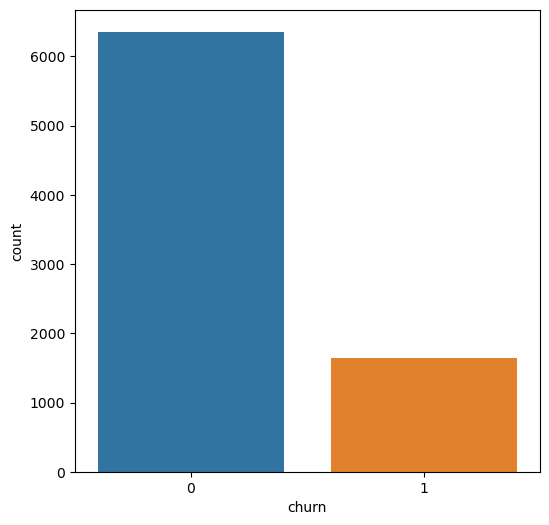

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
        ColumnName  OutlierPercentage
0              age             3.5125
1  products_number             0.6375
2     credit_score             0.1750
3            churn            20.5250


Analysis complete. No action taken.                                                     


All categorical columns seem to be significant.                                         


Dataset does not contain any feature related to dates.                                  


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


No Missing Values Detected.                                                              


No imputation is Required.                                                               


No information provided for Equal-Width Transformation.                                  


,ColumnName,MinValue,MaxValue,Label
0,age,0,24,young
1,age,25,49,adult
2,age,50,74,old
3,age,75,100,older


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171259672504896"'21


credit_score,gender,credit_card,estimated_salary,churn,id,country,tenure,active_member,customer_id,balance,products_number,age
732,Female,1,177783.04,0,6165,Spain,1,1,15665460,0.0,2,old  
732,Female,0,3749.0,1,7724,France,9,0,15590349,0.0,1,adult
732,Male,1,25438.87,0,2821,France,2,1,15645717,0.0,2,old  
732,Female,1,90876.95,0,5962,France,3,0,15604551,0.0,2,adult
732,Female,1,45098.62,0,5953,Spain,8,1,15800845,111379.55,1,adult
732,Male,0,13404.4,0,4818,Spain,0,1,15797627,134249.7,1,old  
732,Female,1,183147.17,0,7265,France,9,0,15623143,0.0,2,adult
732,Male,0,172576.56,0,4298,France,0,0,15639368,110942.9,1,adult
732,Male,0,91936.1,1,6676,Germany,6,0,15707567,145338.76,1,old  
732,Male,1,104222.8,0,1976,France,10,1,15628999,61811.23,1,older


Skipping customized string manipulation.⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 23% - 5/21


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171254959600569"'21


gender,credit_score,estimated_salary,credit_card,churn,id,country,tenure,active_member,customer_id,age,balance,products_number
0.1644426089918256,772,186948.35,1,0,3269,Spain,3,1,15774551,adult,112029.83,1
0.1644426089918256,507,51424.29,1,0,6965,Spain,6,1,15794414,adult,92783.68,1
0.1644426089918256,670,77864.41,1,0,7224,France,7,1,15570855,adult,0.0,2
0.1644426089918256,850,191535.11,1,1,5194,Germany,5,0,15729557,adult,119984.07,1
0.1644426089918256,509,171770.58,1,0,3978,France,7,0,15728829,young,102983.91,1
0.1644426089918256,598,198894.42,1,0,6700,Germany,9,0,15742172,adult,123938.6,2
0.1644426089918256,576,78955.8,0,1,1720,France,9,0,15756920,old  ,70655.48,1
0.1644426089918256,772,197238.03,0,0,620,Germany,6,0,15804602,adult,99785.28,2
0.1644426089918256,631,125877.22,0,0,2539,France,7,1,15633525,adult,0.0,2
0.1644426089918256,509,180598.86,1,0,4731,France,6,0,15634310,adult,0.0,2


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171262426493698"'21


['country', 'age']


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


gender,credit_score,estimated_salary,credit_card,churn,id,country_0,country_1,country_2,tenure,active_member,age_0,age_1,age_2,age_3,balance,products_number
0.1644426089918256,721,160277.65,1,0,2700,1,0,0,9,1,1,0,0,0,118129.87,1
0.1644426089918256,567,167984.61,1,0,191,1,0,0,2,1,1,0,0,0,0.0,2
0.1644426089918256,699,76510.46,1,0,5240,0,0,1,8,1,1,0,0,0,0.0,1
0.1644426089918256,615,73124.53,1,1,2388,1,0,0,1,1,1,0,0,0,83503.11,2
0.1644426089918256,486,168034.83,1,1,6921,0,1,0,9,0,0,1,0,0,118356.89,2
0.1644426089918256,459,155721.15,1,0,6210,0,1,0,5,0,0,1,0,0,109387.9,1
0.1644426089918256,584,147600.54,1,0,3626,1,0,0,4,0,1,0,0,0,0.0,2
0.1644426089918256,806,143711.02,1,0,7062,0,1,0,2,0,1,0,0,0,96152.68,2
0.1644426089918256,791,75832.53,1,0,5257,1,0,0,2,0,1,0,0,0,163789.49,2
0.1644426089918256,772,186948.35,1,0,3269,0,0,1,3,1,1,0,0,0,112029.83,1


No information provided for performing customized train test split. Proceeding with default option.
No information provided for performing customized imbalanced dataset sampling. AutoML will Proceed with default option.


Training size : 0.8                                                                       
Testing size  : 0.2                                                                       


gender,credit_score,estimated_salary,credit_card,churn,id,country_0,country_1,country_2,tenure,active_member,age_0,age_1,age_2,age_3,balance,products_number
0.2551987909949972,569,133997.53,1,0,11,0,0,1,3,0,1,0,0,0,0.0,1
0.2551987909949972,731,24998.75,1,1,13,1,0,0,10,1,0,1,0,0,0.0,1
0.1644426089918256,681,187280.51,0,1,14,0,1,0,8,0,1,0,0,0,142946.18,1
0.2551987909949972,728,20276.87,1,1,15,1,0,0,2,0,1,0,0,0,109705.52,1
0.1644426089918256,710,119348.76,1,1,17,0,0,1,3,0,0,1,0,0,131078.42,2
0.2551987909949972,850,132298.49,1,0,18,0,0,1,8,1,0,1,0,0,126776.3,2
0.2551987909949972,768,125870.5,0,0,16,1,0,0,3,1,1,0,0,0,141334.95,1
0.1644426089918256,658,49809.88,0,0,12,1,0,0,5,1,1,0,0,0,100082.14,1
0.1644426089918256,757,143829.54,1,0,9,1,0,0,3,0,1,0,0,0,130747.1,1
0.1644426089918256,638,37294.88,1,0,8,0,1,0,2,1,1,0,0,0,89728.86,2


gender,credit_score,estimated_salary,credit_card,churn,id,country_0,country_1,country_2,tenure,active_member,age_0,age_1,age_2,age_3,balance,products_number
0.2551987909949972,527,182266.01,1,0,30,1,0,0,1,0,1,0,0,0,112203.25,1
0.2551987909949972,754,73881.68,1,1,33,1,0,0,6,0,1,0,0,0,0.0,1
0.2551987909949972,579,126838.7,1,0,37,1,0,0,9,0,1,0,0,0,0.0,2
0.1644426089918256,709,77142.85,0,0,53,1,0,0,9,1,1,0,0,0,118546.71,1
0.1644426089918256,778,144494.94,1,0,67,1,0,0,8,0,1,0,0,0,123863.64,1
0.1644426089918256,557,150944.31,1,1,74,1,0,0,6,0,1,0,0,0,177822.03,1
0.1644426089918256,753,159475.08,1,1,63,1,0,0,7,0,0,1,0,0,0.0,1
0.2551987909949972,774,102426.06,1,0,32,1,0,0,5,0,1,0,0,0,126670.37,1
0.1644426089918256,665,132152.32,1,0,22,0,0,1,8,0,1,0,0,0,0.0,2
0.2551987909949972,655,79555.08,1,1,10,0,1,0,4,0,1,0,0,0,108862.76,1


No information provided for customized outlier processing. AutoML will proceed with default settings.


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
        ColumnName  OutlierPercentage
0  products_number             0.6375
1            churn            20.5250
2     credit_score             0.1750


['credit_score', 'products_number']
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171255330522886"'/21


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171254931285803"'/21
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171254777646996"'


['age_3', 'credit_score', 'gender', 'credit_card', 'estimated_salary', 'age_1', 'country_2', 'country_1', 'tenure', 'country_0', 'active_member', 'balance', 'age_2', 'age_0', 'products_number']


['credit_score', 'gender', 'credit_card', 'estimated_salary', 'tenure', 'active_member', 'balance', 'products_number']


age_3,age_1,churn,country_2,country_1,id,country_0,age_2,age_0,credit_score,gender,credit_card,estimated_salary,tenure,active_member,balance,products_number
1,0,0,0,0,2,1,0,0,0.3000081274402116,-1.046714429326855,-1.3025083346504496,-0.557470578444478,-1.414431488984784,-0.7658100240811084,-0.025115227835765967,-0.7230952464075849
1,0,0,1,0,4,0,0,0,0.6331406901961997,-1.046714429326855,0.7677494058172389,-1.3248826601896364,-1.0449630567033084,1.30580688232708,0.9611798325118177,-0.7230952464075849
0,1,0,0,1,5,0,0,0,0.5332009213694033,-1.046714429326855,0.7677494058172389,-0.8185007605443856,-1.414431488984784,1.30580688232708,1.072537140842772,-0.7230952464075849
1,0,0,0,0,6,1,0,0,0.2000683586134152,-1.046714429326855,0.7677494058172389,-0.15915781627739,-1.414431488984784,-0.7658100240811084,-1.3384031162259336,1.155549042905686
1,0,0,1,0,8,0,0,0,0.1334418460622176,-1.046714429326855,0.7677494058172389,0.16501766339702237,1.171847536985545,-0.7658100240811084,-1.3384031162259336,-0.7230952464075849
0,1,1,0,1,9,0,0,0,1.1661527906057807,-1.046714429326855,0.7677494058172389,0.360728343475501,-1.414431488984784,1.30580688232708,0.881438035221071,-0.7230952464075849
0,1,0,0,1,7,0,0,0,1.3771367470179063,-1.046714429326855,0.7677494058172389,-0.2437065669357649,1.171847536985545,1.30580688232708,0.5556204383323323,1.155549042905686
0,0,0,0,1,3,0,0,1,0.9995865092277866,-1.046714429326855,0.7677494058172389,0.08312800920542407,-0.6754946244218328,1.30580688232708,-0.37041069184793535,1.155549042905686
0,0,0,0,0,1,1,0,1,-0.36625699807176454,-1.046714429326855,0.7677494058172389,1.1495863974687615,1.5413159692670206,1.30580688232708,-1.3384031162259336,-0.7230952464075849
1,0,0,0,0,0,1,0,0,0.9107511591595231,-1.046714429326855,0.7677494058172389,0.8822770893236617,0.4329106724225939,1.30580688232708,-1.3384031162259336,1.155549042905686


age_3,age_1,churn,country_2,country_1,id,country_0,age_2,age_0,credit_score,gender,credit_card,estimated_salary,tenure,active_member,balance,products_number
1,0,0,0,1,643,0,0,0,0.3222169649572775,-1.046714429326855,0.7677494058172389,-0.15811063000402312,1.910784401548496,1.30580688232708,0.5452872061871328,-0.7230952464075849
1,0,0,0,0,740,1,0,0,0.6997672027473973,-1.046714429326855,-1.3025083346504496,-0.5891638428200615,-1.0449630567033084,1.30580688232708,-1.3384031162259336,1.155549042905686
0,0,0,0,0,37,1,0,1,-0.7771204921374831,1.0932579247585703,0.7677494058172389,0.452866678175454,1.5413159692670206,-0.7658100240811084,-1.3384031162259336,1.155549042905686
1,0,0,1,0,810,0,0,0,-0.06643769159137526,1.0932579247585703,0.7677494058172389,-1.6795650327837595,-1.7838999212662594,1.30580688232708,0.8346064592416826,-0.7230952464075849
1,0,0,1,0,857,0,0,0,0.6109318526791339,-1.046714429326855,0.7677494058172389,0.4670224360076915,1.910784401548496,1.30580688232708,0.6519882519465541,-0.7230952464075849
0,0,0,0,0,67,1,0,1,1.4326588408105712,-1.046714429326855,0.7677494058172389,0.7592865019618699,1.171847536985545,-0.7658100240811084,0.6805761980142891,-0.7230952464075849
0,0,0,0,0,53,1,0,1,0.6664539464717986,-1.046714429326855,-1.3025083346504496,-0.40959291684116045,1.5413159692670206,1.30580688232708,0.5939101539252954,-0.7230952464075849
0,0,1,0,0,33,1,0,1,1.1661527906057807,1.0932579247585703,0.7677494058172389,-0.4661897424811353,0.4329106724225939,-0.7658100240811084,-1.3384031162259336,-0.7230952464075849
0,0,0,0,0,30,1,0,1,-1.3545502675811958,1.0932579247585703,0.7677494058172389,1.414794391162763,-1.414431488984784,-0.7658100240811084,0.4905116544083242,-0.7230952464075849
1,0,0,0,0,550,1,0,0,-0.14416862290110583,1.0932579247585703,-1.3025083346504496,-0.0030756914534193678,1.910784401548496,-0.7658100240811084,0.687148690467183,-0.7230952464075849


['age_3', 'credit_score', 'credit_card', 'country_2', 'country_1', 'tenure', 'country_0', 'age_2', 'age_0', 'products_number', 'age_1', 'active_member', 'gender', 'estimated_salary', 'balance']


['r_credit_score', 'r_credit_card', 'r_tenure', 'r_products_number', 'r_active_member', 'r_gender', 'r_estimated_salary', 'r_balance']


churn,r_age_0,r_country_0,r_age_2,id,r_country_2,r_age_3,r_age_1,r_country_1,r_credit_score,r_credit_card,r_tenure,r_products_number,r_active_member,r_gender,r_estimated_salary,r_balance
0,0,1,0,2,0,1,0,0,0.3000081274402116,-1.3025083346504496,-1.414431488984784,-0.7230952464075849,-0.7658100240811084,-1.046714429326855,-0.557470578444478,-0.025115227835765967
0,0,0,0,4,1,1,0,0,0.6331406901961997,0.7677494058172389,-1.0449630567033084,-0.7230952464075849,1.30580688232708,-1.046714429326855,-1.3248826601896364,0.9611798325118177
0,0,0,0,5,0,0,1,1,0.5332009213694033,0.7677494058172389,-1.414431488984784,-0.7230952464075849,1.30580688232708,-1.046714429326855,-0.8185007605443856,1.072537140842772
0,0,1,0,6,0,1,0,0,0.2000683586134152,0.7677494058172389,-1.414431488984784,1.155549042905686,-0.7658100240811084,-1.046714429326855,-0.15915781627739,-1.3384031162259336
0,0,0,0,8,1,1,0,0,0.1334418460622176,0.7677494058172389,1.171847536985545,-0.7230952464075849,-0.7658100240811084,-1.046714429326855,0.16501766339702237,-1.3384031162259336
1,0,0,0,9,0,0,1,1,1.1661527906057807,0.7677494058172389,-1.414431488984784,-0.7230952464075849,1.30580688232708,-1.046714429326855,0.360728343475501,0.881438035221071
0,0,0,0,7,0,0,1,1,1.3771367470179063,0.7677494058172389,1.171847536985545,1.155549042905686,1.30580688232708,-1.046714429326855,-0.2437065669357649,0.5556204383323323
0,1,0,0,3,0,0,0,1,0.9995865092277866,0.7677494058172389,-0.6754946244218328,1.155549042905686,1.30580688232708,-1.046714429326855,0.08312800920542407,-0.37041069184793535
0,1,1,0,1,0,0,0,0,-0.36625699807176454,0.7677494058172389,1.5413159692670206,-0.7230952464075849,1.30580688232708,-1.046714429326855,1.1495863974687615,-1.3384031162259336
0,0,1,0,0,0,1,0,0,0.9107511591595231,0.7677494058172389,0.4329106724225939,1.155549042905686,1.30580688232708,-1.046714429326855,0.8822770893236617,-1.3384031162259336


churn,r_age_0,r_country_0,r_age_2,id,r_country_2,r_age_3,r_age_1,r_country_1,r_credit_score,r_credit_card,r_tenure,r_products_number,r_active_member,r_gender,r_estimated_salary,r_balance
0,0,0,0,643,0,1,0,1,0.3222169649572775,0.7677494058172389,1.910784401548496,-0.7230952464075849,1.30580688232708,-1.046714429326855,-0.15811063000402312,0.5452872061871328
0,0,1,0,740,0,1,0,0,0.6997672027473973,-1.3025083346504496,-1.0449630567033084,1.155549042905686,1.30580688232708,-1.046714429326855,-0.5891638428200615,-1.3384031162259336
0,1,1,0,37,0,0,0,0,-0.7771204921374831,0.7677494058172389,1.5413159692670206,1.155549042905686,-0.7658100240811084,1.0932579247585703,0.452866678175454,-1.3384031162259336
0,0,0,0,810,1,1,0,0,-0.06643769159137526,0.7677494058172389,-1.7838999212662594,-0.7230952464075849,1.30580688232708,1.0932579247585703,-1.6795650327837595,0.8346064592416826
0,0,0,0,857,1,1,0,0,0.6109318526791339,0.7677494058172389,1.910784401548496,-0.7230952464075849,1.30580688232708,-1.046714429326855,0.4670224360076915,0.6519882519465541
0,1,1,0,67,0,0,0,0,1.4326588408105712,0.7677494058172389,1.171847536985545,-0.7230952464075849,-0.7658100240811084,-1.046714429326855,0.7592865019618699,0.6805761980142891
0,1,1,0,53,0,0,0,0,0.6664539464717986,-1.3025083346504496,1.5413159692670206,-0.7230952464075849,1.30580688232708,-1.046714429326855,-0.40959291684116045,0.5939101539252954
1,1,1,0,33,0,0,0,0,1.1661527906057807,0.7677494058172389,0.4329106724225939,-0.7230952464075849,-0.7658100240811084,1.0932579247585703,-0.4661897424811353,-1.3384031162259336
0,1,1,0,30,0,0,0,0,-1.3545502675811958,0.7677494058172389,-1.414431488984784,-0.7230952464075849,-0.7658100240811084,1.0932579247585703,1.414794391162763,0.4905116544083242
0,0,1,0,550,0,1,0,0,-0.14416862290110583,-1.3025083346504496,1.910784401548496,-0.7230952464075849,-0.7658100240811084,1.0932579247585703,-0.0030756914534193678,0.687148690467183


['gender', 'credit_score', 'estimated_salary', 'credit_card', 'tenure', 'active_member', 'balance', 'products_number']


age_3,age_1,churn,country_2,country_1,id,country_0,age_2,age_0,gender,credit_score,estimated_salary,credit_card,tenure,active_member,balance,products_number
0,0,0,0,0,982,1,0,1,-0.9020611319167776,-0.3651785072281303,1.1593568296583305,0.6408327915039258,1.3810317478131628,0.968975048740969,-1.2347430599880822,-0.9219932591048253
0,0,0,0,1,27,0,0,1,-0.9020611319167776,0.9155115716334966,0.0896292939105996,0.6408327915039258,-0.7041477182420084,0.968975048740969,-0.284593984548306,0.8922699798280427
0,1,0,0,1,1615,0,0,0,-0.9020611319167776,0.4782027642173313,-0.814763350601623,0.6408327915039258,-1.399207540260399,0.968975048740969,1.1317554770912066,-0.9219932591048253
0,1,0,0,1,19,0,0,0,-0.9020611319167776,1.2695234633513446,-0.2382071688903631,0.6408327915039258,1.0335018368039677,0.968975048740969,0.6243672841667958,0.8922699798280427
0,1,1,0,1,39,0,0,0,-0.9020611319167776,1.0716932885678414,0.3680805909978228,0.6408327915039258,-1.399207540260399,0.968975048740969,0.9441789693096502,-0.9219932591048253
0,0,0,1,0,4511,0,0,1,-0.9020611319167776,-1.114850748512985,-0.3430826461858977,0.6408327915039258,1.0335018368039677,0.968975048740969,1.0890579526392425,-0.9219932591048253
0,1,1,0,1,3865,0,0,0,-0.9020611319167776,0.9467479150203655,0.36247644623632935,-1.560469459830988,-0.009087896223617971,0.968975048740969,1.2483261330654691,-0.9219932591048253
0,1,0,0,0,1150,1,0,0,-0.9020611319167776,-0.3755906216904199,1.1348483359849877,0.6408327915039258,1.0335018368039677,0.968975048740969,-1.2347430599880822,0.8922699798280427
0,0,0,1,0,102,0,0,1,-0.9020611319167776,0.3532573906698555,-1.579283727873108,-1.560469459830988,0.3384420147855773,-1.0320183180149423,0.09744811811756905,-0.9219932591048253
0,0,1,0,1,62,0,0,1,-0.9020611319167776,-0.31311793491668205,1.2552109795232163,0.6408327915039258,1.0335018368039677,-1.0320183180149423,1.5512069322800093,2.7065332187609106


age_3,age_1,churn,country_2,country_1,id,country_0,age_2,age_0,gender,credit_score,estimated_salary,credit_card,tenure,active_member,balance,products_number
0,0,0,0,0,30,1,0,1,1.1085723180148657,-1.291856694371909,1.4253777983872398,0.6408327915039258,-1.399207540260399,-1.0320183180149423,0.5604586736338613,-0.9219932591048253
0,0,1,0,0,33,1,0,1,1.1085723180148657,1.0716932885678414,-0.4613723497738306,0.6408327915039258,0.3384420147855773,-1.0320183180149423,-1.2347430599880822,-0.9219932591048253
0,0,0,0,0,37,1,0,1,1.1085723180148657,-0.7504267423328473,0.46050136879017917,0.6408327915039258,1.3810317478131628,-1.0320183180149423,-1.2347430599880822,0.8922699798280427
0,0,0,0,0,53,1,0,1,-0.9020611319167776,0.6031481377648071,-0.40460203084785246,-1.560469459830988,1.3810317478131628,0.968975048740969,0.6619511918021092,-0.9219932591048253
0,0,0,0,0,67,1,0,1,-0.9020611319167776,1.3215840356627928,0.7678604993579229,0.6408327915039258,1.0335018368039677,-1.0320183180149423,0.7470196898495945,-0.9219932591048253
0,0,1,0,0,74,1,0,1,-0.9020611319167776,-0.9794932605032196,0.8801308783236419,0.6408327915039258,0.3384420147855773,-1.0320183180149423,1.6103297568168966,-0.9219932591048253
0,1,1,0,0,63,1,0,0,-0.9020611319167776,1.0612811741055517,1.0286341865179907,0.6408327915039258,0.6859719257947725,-1.0320183180149423,-1.2347430599880822,-0.9219932591048253
0,0,0,0,0,32,1,0,1,1.1085723180148657,1.2799355778136343,0.035527093108419006,0.6408327915039258,-0.009087896223617971,-1.0320183180149423,0.791926112451513,-0.9219932591048253
0,0,0,1,0,22,0,0,1,-0.9020611319167776,0.14501510142406254,0.5530006564849191,0.6408327915039258,1.0335018368039677,-1.0320183180149423,-1.2347430599880822,0.8922699798280427
0,0,1,0,1,10,0,0,1,1.1085723180148657,0.040893956801166045,-0.36261002600823616,0.6408327915039258,-0.3566178072328132,-1.0320183180149423,0.5070123301531976,-0.9219932591048253


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9']


                                                                                          
Skipping customized hyperparameter tuning


response_column : churn                                                                                                                               
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.2, 0.3)
max_depth : (5, 4, 6, 7)
min_node_size : (1, 3, 4)
num_trees : (-1, 30, 40)
Total number of models for decision_forest : 108
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : churn
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.1, 0.2)
max_depth : (5, 4, 6, 7)
min_node_size : (1, 3, 4)
iter_num : (10, 30, 40)
Total number of models for xgboost : 3456
---------------------------------------------------------------------------------------------------------------------------------

DECISIONFOREST_3                                                                                                                                                                                        
DECISIONFOREST_2                                                                          


XGBOOST_0                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_2                                                                                 


KNN_0                                                                                                                                                                                                   
KNN_4                                                                                     
KNN_8                                                                                     


,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,pca,0.847500,0.847500,0.847500,0.847500,0.854753,0.647201,0.682158,0.849751,0.847500,0.817125
1,2,decision_forest,pca,0.836875,0.836875,0.836875,0.836875,0.835225,0.622492,0.650087,0.836338,0.836875,0.800604
2,3,xgboost,lasso,0.828125,0.828125,0.828125,0.828125,0.736559,0.718357,0.726602,0.822130,0.828125,0.824689
3,4,knn,pca,0.807500,0.807500,0.807500,0.807500,0.698648,0.651310,0.667601,0.789070,0.807500,0.794561
4,5,decision_forest,lasso,0.793125,0.793125,0.793125,0.793125,0.670440,0.632124,0.645257,0.773260,0.793125,0.780099
5,6,knn,lasso,0.788750,0.788750,0.788750,0.788750,0.683042,0.698079,0.689692,0.798027,0.788750,0.792914
6,7,knn,rfe,0.784375,0.784375,0.784375,0.784375,0.681805,0.706589,0.691770,0.800796,0.784375,0.791239
7,8,xgboost,rfe,0.205625,0.205625,0.205625,0.205625,0.102813,0.500000,0.170555,0.042282,0.205625,0.070141


In [17]:
# Fitting train data
aml.fit(bank_df_train, bank_df_train.churn)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,pca,0.847500,0.847500,0.847500,0.847500,0.854753,0.647201,0.682158,0.849751,0.847500,0.817125
1,2,decision_forest,pca,0.836875,0.836875,0.836875,0.836875,0.835225,0.622492,0.650087,0.836338,0.836875,0.800604
2,3,xgboost,lasso,0.828125,0.828125,0.828125,0.828125,0.736559,0.718357,0.726602,0.822130,0.828125,0.824689
3,4,knn,pca,0.807500,0.807500,0.807500,0.807500,0.698648,0.651310,0.667601,0.789070,0.807500,0.794561
4,5,decision_forest,lasso,0.793125,0.793125,0.793125,0.793125,0.670440,0.632124,0.645257,0.773260,0.793125,0.780099
5,6,knn,lasso,0.788750,0.788750,0.788750,0.788750,0.683042,0.698079,0.689692,0.798027,0.788750,0.792914
6,7,knn,rfe,0.784375,0.784375,0.784375,0.784375,0.681805,0.706589,0.691770,0.800796,0.784375,0.791239
7,8,xgboost,rfe,0.205625,0.205625,0.205625,0.205625,0.102813,0.500000,0.170555,0.042282,0.205625,0.070141


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,pca,0.8475,0.8475,0.8475,0.8475,0.854753,0.647201,0.682158,0.849751,0.8475,0.817125


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [20]:
# Generating prediction and metrics on default test data
prediction = aml.predict(rank=2)

decision_forest pca

 Prediction : 
   id  prediction   prob  churn
0  30           0  0.625      0
1  33           0  0.750      1
2  37           0  0.875      0
3  53           0  0.750      0
4  67           0  1.000      0
5  74           0  1.000      1
6  63           1  0.750      1
7  32           0  1.000      0
8  22           0  1.000      0
9  10           0  1.000      1

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1     1254      244   0.837116  0.986625  0.905742     1271
1               1  CLASS_2       17       85   0.833333  0.258359  0.394432      329

 ROC-AUC : 


AUC,GINI
0.6207638721156307,0.24152774423126133


threshold_value,tpr,fpr
0.04081632653061224,0.25835866261398177,0.013375295043273014
0.08163265306122448,0.25835866261398177,0.013375295043273014
0.1020408163265306,0.25835866261398177,0.013375295043273014
0.12244897959183673,0.25835866261398177,0.013375295043273014
0.16326530612244897,0.25835866261398177,0.013375295043273014
0.18367346938775508,0.25835866261398177,0.013375295043273014
0.14285714285714285,0.25835866261398177,0.013375295043273014
0.061224489795918366,0.25835866261398177,0.013375295043273014
0.02040816326530612,0.25835866261398177,0.013375295043273014
0.0,1.0,1.0



 Confusion Matrix : 


array([[1254,   17],
       [ 244,   85]], dtype=int64)

In [21]:
# Printing prediction
prediction.head()

id,prediction,prob,churn
30,0,0.625,0
33,0,0.75,1
37,0,0.875,0
53,0,0.75,0
67,0,1.0,0
74,0,1.0,1
63,1,0.75,1
32,0,1.0,0
22,0,1.0,0
10,0,1.0,1


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [22]:
# Generating prediction and metrics on test data
prediction = aml.predict(bank_df_test)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...

Updated dataset after performing target column transformation :


credit_score,gender,credit_card,estimated_salary,id,country,tenure,active_member,customer_id,age,balance,products_number,churn
507,Female,1,60688.38,13,Spain,4,1,15768777,34,0.0,2,0
639,Female,0,93716.38,9,France,5,0,15663942,38,0.0,2,0
666,Male,1,35156.54,17,France,3,0,15569364,36,0.0,2,0
612,Female,1,9209.21,15,France,1,1,15667633,38,0.0,2,0
721,Male,0,101300.94,10,Germany,9,1,15609618,28,154475.54,2,1
834,Female,1,140225.14,18,Germany,8,0,15806808,57,112281.6,3,1
672,Male,1,169469.3,14,France,4,1,15694530,28,167268.98,1,0
687,Female,1,158615.41,22,France,3,0,15721019,24,110495.27,1,0
639,Female,1,133995.59,8,Germany,10,1,15717736,46,110031.09,2,0
604,Female,1,166224.39,16,Spain,10,1,15602909,41,0.0,2,0


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171259045424654"'

Updated dataset after performing customized variable width bin-code transformation :


credit_score,gender,estimated_salary,credit_card,churn,id,country,tenure,active_member,customer_id,balance,products_number,age
507,Female,94780.9,0,0,710,Spain,6,1,15591130,0.0,2,adult
772,Male,121073.23,1,0,1364,Germany,7,1,15594786,111565.91,1,adult
772,Female,90928.48,1,0,158,Germany,0,0,15772363,101979.16,1,adult
772,Female,140709.25,1,0,689,Spain,4,1,15716357,122486.11,2,adult
587,Female,30579.82,1,0,323,France,1,0,15744200,70784.27,1,adult
505,Female,45445.78,1,1,1797,Germany,3,0,15572182,106506.77,3,adult
425,Female,140941.47,1,0,73,Spain,5,0,15582944,0.0,2,adult
507,Male,166423.66,1,1,290,Germany,2,1,15771543,134237.07,1,adult
507,Female,142911.99,0,0,195,France,1,0,15693996,113452.66,1,adult
507,Female,60688.38,1,0,13,Spain,4,1,15768777,0.0,2,adult


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171256654081441"'

Updated dataset after performing customized categorical encoding :


gender,credit_score,estimated_salary,credit_card,churn,id,country,tenure,active_member,customer_id,age,balance,products_number
0.1644426089918256,684,75609.84,1,0,1957,France,4,0,15771000,adult,0.0,3
0.1644426089918256,486,144995.33,1,0,1407,Germany,9,0,15578186,adult,115217.99,2
0.1644426089918256,714,132979.43,1,0,1409,Spain,2,1,15798439,adult,0.0,1
0.1644426089918256,547,85153.0,1,0,466,France,10,1,15573045,old  ,127738.75,2
0.1644426089918256,528,111149.98,0,0,2007,Germany,2,1,15751771,adult,99092.45,1
0.1644426089918256,548,31728.35,1,0,898,Spain,6,1,15595713,adult,0.0,1
0.1644426089918256,625,122810.53,1,0,792,Germany,3,0,15743067,adult,130483.95,1
0.1644426089918256,539,146752.67,1,0,574,France,0,1,15652674,young,83459.86,1
0.1644426089918256,647,40145.28,1,0,1829,Germany,3,1,15690332,adult,192407.97,1
0.1644426089918256,774,143133.18,1,0,802,France,4,1,15751774,older,112510.89,1


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171257578390789"'

Updated dataset after performing categorical encoding :


gender,credit_score,estimated_salary,credit_card,churn,id,country_0,country_1,country_2,tenure,active_member,customer_id,age_0,age_1,age_2,age_3,balance,products_number
0.1644426089918256,496,66469.2,1,0,995,1,0,0,4,0,15621409,1,0,0,0,127845.83,1
0.1644426089918256,689,49656.24,1,0,1367,1,0,0,8,0,15568562,1,0,0,0,160272.27,1
0.1644426089918256,810,110509.9,1,0,1161,0,1,0,3,1,15674156,0,1,0,0,27288.43,1
0.1644426089918256,850,109291.22,1,0,803,1,0,0,6,0,15624471,1,0,0,0,0.0,2
0.1644426089918256,629,158420.14,0,0,1177,0,0,1,4,1,15678173,1,0,0,0,174588.8,2
0.1644426089918256,521,51454.06,1,0,254,1,0,0,6,0,15782231,1,0,0,0,0.0,2
0.1644426089918256,794,88992.05,1,0,1308,1,0,0,10,1,15713346,0,0,0,1,146126.75,1
0.1644426089918256,416,878.87,0,0,916,1,0,0,0,1,15794413,1,0,0,0,0.0,2
0.1644426089918256,634,56055.72,1,0,775,0,1,0,2,1,15790846,1,0,0,0,148430.55,1
0.1644426089918256,850,180243.56,1,0,106,0,0,1,5,1,15719793,0,1,0,0,0.0,2



Updated dataset after performing customized anti-selection :


gender,credit_score,estimated_salary,credit_card,churn,id,country_0,country_1,country_2,tenure,active_member,age_0,age_1,age_2,age_3,balance,products_number
0.1644426089918256,496,66469.2,1,0,995,1,0,0,4,0,1,0,0,0,127845.83,1
0.1644426089918256,689,49656.24,1,0,1367,1,0,0,8,0,1,0,0,0,160272.27,1
0.1644426089918256,810,110509.9,1,0,1161,0,1,0,3,1,0,1,0,0,27288.43,1
0.1644426089918256,850,109291.22,1,0,803,1,0,0,6,0,1,0,0,0,0.0,2
0.1644426089918256,629,158420.14,0,0,1177,0,0,1,4,1,1,0,0,0,174588.8,2
0.1644426089918256,521,51454.06,1,0,254,1,0,0,6,0,1,0,0,0,0.0,2
0.1644426089918256,794,88992.05,1,0,1308,1,0,0,10,1,0,0,0,1,146126.75,1
0.1644426089918256,416,878.87,0,0,916,1,0,0,0,1,1,0,0,0,0.0,2
0.1644426089918256,634,56055.72,1,0,775,0,1,0,2,1,1,0,0,0,148430.55,1
0.1644426089918256,850,180243.56,1,0,106,0,0,1,5,1,0,1,0,0,0.0,2


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171260163667664"'

Updated dataset after performing Lasso feature selection:


id,age_3,credit_score,gender,credit_card,estimated_salary,age_1,country_2,country_1,tenure,country_0,active_member,balance,age_2,age_0,products_number,churn
130,1,746,0.1644,0,47997.39,0,1,0,10,0,1,68781.82,0,0,1,0
574,1,539,0.1644,1,146752.67,0,0,0,0,1,1,83459.86,0,0,1,0
628,1,693,0.1644,1,3494.02,0,0,0,1,1,1,0.0,0,0,2,0
1097,1,706,0.1644,1,129654.22,0,0,0,2,1,0,176139.5,0,0,2,0
859,1,805,0.1644,1,186035.72,0,0,1,6,0,0,143221.35,0,0,2,0
405,1,767,0.1644,0,150135.38,0,0,1,3,0,1,119714.25,0,0,2,0
995,0,496,0.1644,1,66469.2,0,0,0,4,1,0,127845.83,0,1,1,0
1367,0,689,0.1644,1,49656.24,0,0,0,8,1,0,160272.27,0,1,1,0
1161,0,810,0.1644,1,110509.9,1,0,1,3,0,1,27288.43,0,0,1,0
803,0,850,0.1644,1,109291.22,0,0,0,6,1,0,0.0,0,1,2,0



Updated dataset after performing scaling on Lasso selected features :


age_3,age_1,churn,country_2,country_1,id,country_0,age_2,age_0,credit_score,gender,credit_card,estimated_salary,tenure,active_member,balance,products_number
1,0,0,1,0,130,0,0,0,1.0773174405375172,-1.046714429326855,-1.3025083346504496,-0.915405406780923,1.910784401548496,1.30580688232708,-0.21725834948248524,-0.7230952464075849
1,0,0,0,0,574,1,0,0,-1.2212972424788007,-1.046714429326855,0.7677494058172389,0.7984688663133573,-1.7838999212662594,1.30580688232708,0.021993937416160295,-0.7230952464075849
1,0,0,0,0,628,1,0,0,0.48878324633527154,-1.046714429326855,0.7677494058172389,-1.687750752862629,-1.414431488984784,1.30580688232708,-1.3384031162259336,1.155549042905686
1,0,0,0,0,1097,1,0,0,0.6331406901961997,-1.046714429326855,0.7677494058172389,0.5017293546154622,-1.0449630567033084,-0.7658100240811084,1.5326735526061444,1.155549042905686
1,0,0,0,1,859,0,0,0,1.7324781472909603,-1.046714429326855,0.7677494058172389,1.480216806916394,0.4329106724225939,-0.7658100240811084,0.9961071808035977,1.155549042905686
1,0,0,0,1,405,0,0,0,1.3105102344667088,-1.046714429326855,-1.3025083346504496,0.8571749895944492,-0.6754946244218328,1.30580688232708,0.6129410746099129,1.155549042905686
0,0,0,0,0,995,1,0,1,-1.6987872490957168,-1.046714429326855,0.7677494058172389,-0.5948315606383607,-0.30602619214035726,-0.7658100240811084,0.7454859587428959,-0.7230952464075849
0,0,0,0,0,1367,1,0,1,0.4443655713011398,-1.046714429326855,0.7677494058172389,-0.8866164616437875,1.171847536985545,-0.7658100240811084,1.274037449676407,-0.7230952464075849
0,1,0,0,1,1161,0,0,0,1.788000241083625,-1.046714429326855,0.7677494058172389,0.16948425821267443,-0.6754946244218328,1.30580688232708,-0.8936012705180864,-0.7230952464075849
0,0,0,0,0,803,1,0,1,2.2321769914249425,-1.046714429326855,0.7677494058172389,0.14833435818571358,0.4329106724225939,-0.7658100240811084,-1.3384031162259336,1.155549042905686



Updated dataset after performing RFE feature selection:


id,age_3,credit_score,credit_card,country_2,country_1,tenure,country_0,age_2,age_0,products_number,age_1,active_member,gender,estimated_salary,balance,churn
130,1,746,0,1,0,10,0,0,0,1,0,1,0.1644,47997.39,68781.82,0
574,1,539,1,0,0,0,1,0,0,1,0,1,0.1644,146752.67,83459.86,0
628,1,693,1,0,0,1,1,0,0,2,0,1,0.1644,3494.02,0.0,0
1097,1,706,1,0,0,2,1,0,0,2,0,0,0.1644,129654.22,176139.5,0
859,1,805,1,0,1,6,0,0,0,2,0,0,0.1644,186035.72,143221.35,0
405,1,767,0,0,1,3,0,0,0,2,0,1,0.1644,150135.38,119714.25,0
995,0,496,1,0,0,4,1,0,1,1,0,0,0.1644,66469.2,127845.83,0
1367,0,689,1,0,0,8,1,0,1,1,0,0,0.1644,49656.24,160272.27,0
1161,0,810,1,0,1,3,0,0,0,1,1,1,0.1644,110509.9,27288.43,0
803,0,850,1,0,0,6,1,0,1,2,0,0,0.1644,109291.22,0.0,0



Updated dataset after performing scaling on RFE selected features :


churn,r_age_0,r_age_2,r_country_0,id,r_country_2,r_age_3,r_age_1,r_country_1,r_credit_score,r_credit_card,r_tenure,r_products_number,r_active_member,r_gender,r_estimated_salary,r_balance
0,0,0,0,1161,0,0,1,1,1.788000241083625,0.7677494058172389,-0.6754946244218328,-0.7230952464075849,1.30580688232708,-1.046714429326855,0.16948425821267443,-0.8936012705180864
0,1,0,1,254,0,0,0,0,-1.4211767801323936,0.7677494058172389,0.4329106724225939,1.155549042905686,-0.7658100240811084,-1.046714429326855,-0.8554157253828569,-1.3384031162259336
0,1,0,0,110,1,0,0,0,-0.6993895608277526,0.7677494058172389,0.4329106724225939,1.155549042905686,1.30580688232708,-1.046714429326855,0.3933664010350768,-1.3384031162259336
0,1,0,1,234,0,0,0,0,-0.42177909186442925,0.7677494058172389,0.8023791047040695,1.155549042905686,1.30580688232708,-1.046714429326855,0.9845367205868828,-1.3384031162259336
1,1,0,0,495,0,0,0,1,-1.4322811988909263,-1.3025083346504496,-0.6754946244218328,3.0341933322189574,1.30580688232708,-1.046714429326855,-1.3087399557807038,1.1197235681705546
0,1,0,1,1655,0,0,0,0,-1.1768795674446688,-1.3025083346504496,0.06344224014111832,-0.7230952464075849,-0.7658100240811084,-1.046714429326855,-0.6656363819409148,0.9025587809574853
0,0,0,1,429,0,1,0,0,-0.988104448549609,0.7677494058172389,-1.414431488984784,-0.7230952464075849,-0.7658100240811084,-1.046714429326855,-0.19106437066456922,0.5537731575186665
0,0,0,0,1862,0,1,0,1,0.7219760402644632,-1.3025083346504496,0.4329106724225939,1.155549042905686,-0.7658100240811084,-1.046714429326855,-1.2740727795754192,0.0699593425087455
0,0,0,0,130,1,1,0,0,1.0773174405375172,-1.3025083346504496,1.910784401548496,-0.7230952464075849,1.30580688232708,-1.046714429326855,-0.915405406780923,-0.21725834948248524
0,0,0,1,1132,0,1,0,0,0.12233742730368465,0.7677494058172389,0.06344224014111832,-0.7230952464075849,1.30580688232708,-1.046714429326855,-1.0478003655327512,0.7422880586031875



Updated dataset after performing scaling for PCA feature selection :


age_3,age_1,churn,country_2,country_1,id,country_0,age_2,age_0,gender,credit_score,estimated_salary,credit_card,tenure,active_member,balance,products_number
0,1,0,0,1,1161,0,0,0,-0.9030051013780476,1.6547716984560616,0.17625026146412484,0.6408327915039258,-0.7041477182420084,0.968975048740969,-0.7981404050398427,-0.9219932591048253
0,0,0,0,0,254,1,0,1,-0.9030051013780476,-1.354329381145647,-0.8517914754712462,0.6408327915039258,0.3384420147855773,-1.0320183180149423,-1.2347430599880822,0.8922699798280427
0,0,0,1,0,110,0,0,1,-0.9030051013780476,-0.6775419410968198,0.40081869805294446,0.6408327915039258,0.3384420147855773,0.968975048740969,-1.2347430599880822,0.8922699798280427
0,0,0,0,0,234,1,0,1,-0.9030051013780476,-0.4172390795395785,0.993801205482196,0.6408327915039258,0.6859719257947725,0.968975048740969,-1.2347430599880822,0.8922699798280427
0,0,1,0,1,495,0,0,1,-0.9030051013780476,-1.3647414956079367,-1.3065053369918163,-1.560469459830988,-0.7041477182420084,0.968975048740969,1.178072100206938,2.7065332187609106
0,0,0,0,0,1655,1,0,1,-0.9030051013780476,-1.1252628629752748,-0.6614303778136396,-1.560469459830988,-0.009087896223617971,-1.0320183180149423,0.9649103888214793,-0.9219932591048253
1,0,0,0,0,429,1,0,0,-0.9030051013780476,-0.9482569171163506,-0.18540360195022537,0.6408327915039258,-1.399207540260399,-1.0320183180149423,0.6225540549379512,-0.9219932591048253
1,0,0,0,1,1862,0,0,0,-0.9030051013780476,0.6552087100762554,-1.271731891181332,-1.560469459830988,0.3384420147855773,-1.0320183180149423,0.1476585522050107,0.8922699798280427
1,0,0,1,0,130,0,0,0,-0.9030051013780476,0.9883963728695241,-0.9119650506978857,-1.560469459830988,1.7285616588223582,0.968975048740969,-0.13426475382785533,-0.9219932591048253
1,0,0,0,0,1132,1,0,0,-0.9030051013780476,0.09295452911261429,-1.0447658561767061,0.6408327915039258,-0.009087896223617971,0.968975048740969,0.8075939937444699,-0.9219932591048253



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,churn
0,429,-1.135130,-0.408342,0.269512,0.271599,1.640222,-0.167353,-1.361877,-0.373862,-0.543627,0.735925,0
1,995,-1.253649,-1.235511,0.098151,0.427605,1.757195,0.327195,-0.538104,-0.219463,-0.632694,-0.162952,0
2,1862,0.334583,0.122040,-0.031247,-0.295091,-0.323129,2.389910,-0.685156,1.041698,0.257815,0.753926,0
3,1367,-1.465587,-1.481632,-0.978394,-0.108341,-0.336231,0.870473,-0.630823,0.004877,-0.762843,-0.163347,0
4,130,-0.446604,0.664234,-1.427185,-0.128796,-1.082205,2.069579,1.128486,-0.767325,0.863213,0.499438,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1388,1.533279,1.017480,0.598724,0.086572,0.122438,1.646739,-1.518098,2.016808,-0.929508,-0.097813,1
1996,1177,-0.616353,1.831412,0.005372,1.284158,0.056988,0.524550,0.382498,1.560972,0.405996,-0.382561,0
1997,916,1.351096,1.391878,0.467209,-0.317386,3.472418,1.453963,0.652393,-0.058371,-0.451416,-0.260582,0
1998,775,-1.585726,0.580062,-1.163121,-0.567997,1.221762,-0.367139,-0.377342,0.397206,0.248916,-0.299868,0


Data Transformation completed.
xgboost pca

 Prediction : 
     id  Prediction  Confidence_Lower  Confidence_upper  churn
0  1862           0             0.750             0.750      0
1   130           0             1.000             1.000      0
2  1161           0             0.875             0.875      0
3  1132           0             1.000             1.000      0
4   574           0             1.000             1.000      0
5   254           0             1.000             1.000      0
6   803           0             1.000             1.000      0
7  1367           0             1.000             1.000      0
8   995           0             1.000             1.000      0
9   429           0             1.000             1.000      0

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
1               1  CLASS_2       25      103   0.8046

AUC,GINI
0.6205607476635514,0.2411214953271028


threshold_value,tpr,fpr
0.04081632653061224,0.2607594936708861,0.01557632398753894
0.08163265306122448,0.2607594936708861,0.01557632398753894
0.1020408163265306,0.2607594936708861,0.01557632398753894
0.12244897959183673,0.2607594936708861,0.01557632398753894
0.16326530612244897,0.2607594936708861,0.01557632398753894
0.18367346938775508,0.2607594936708861,0.01557632398753894
0.14285714285714285,0.2607594936708861,0.01557632398753894
0.061224489795918366,0.2607594936708861,0.01557632398753894
0.02040816326530612,0.2607594936708861,0.01557632398753894
0.0,1.0,1.0



 Confusion Matrix : 


array([[1580,   25],
       [ 292,  103]], dtype=int64)

In [23]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,churn
10,0,1.0,1.0,1
12,0,0.875,0.875,0
13,0,1.0,1.0,0
14,0,1.0,1.0,0
16,0,1.0,1.0,0
17,0,1.0,1.0,0
15,0,0.875,0.875,0
11,0,0.875,0.875,0
9,0,1.0,1.0,0
8,0,1.0,1.0,0


In [24]:
remove_context()

True